In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [2]:
# Read csv file, convert time to datetime data type
df = pd.read_csv("flex_networks.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], infer_datetime_format=True)

0       2014-01-01 00:30:00
1       2014-01-01 01:00:00
2       2014-01-01 01:30:00
3       2014-01-01 02:00:00
4       2014-01-01 02:30:00
                ...        
17515   2014-12-31 22:00:00
17516   2014-12-31 22:30:00
17517   2014-12-31 23:00:00
17518   2014-12-31 23:30:00
17519   2015-01-01 00:00:00
Name: Timestamp, Length: 17520, dtype: datetime64[ns]


<AxesSubplot:xlabel='Timestamp'>

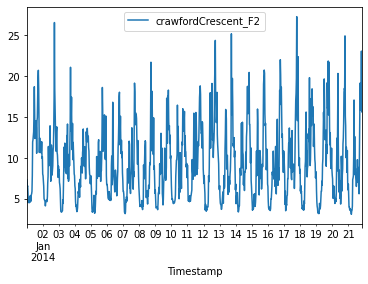

In [3]:
# Plot of example load
df.iloc[0:1000].plot(x="Timestamp", y="crawfordCrescent_F2")
#plt.savefig("test", dpi=100)


In [4]:
# Calculate total load
df["load_total"] = df.iloc[:, :22].sum(axis=1)
# Persistance forcast, shift total by a week (48 * 7 = 336)
df["pers_forecast"] = df["load_total"].shift(336, axis=0)

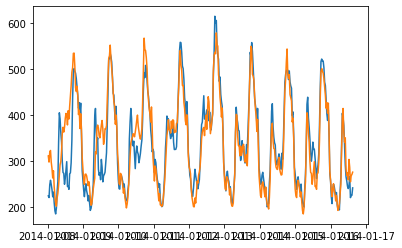

In [83]:
l = 336   # Begnning of graphed data, one week in
h = 750  # Last value of graphed data

plt.plot(df["Timestamp"].iloc[l:h], df["load_total"].iloc[l:h])
plt.plot(df["Timestamp"].iloc[l:h], df["pers_forecast"].iloc[l:h])


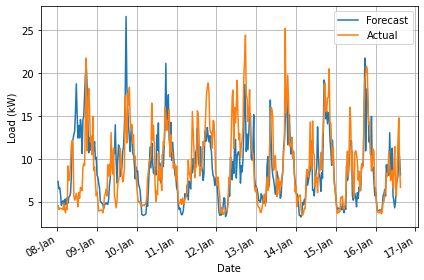

In [97]:
df['crawford_pers_forecast'] = df['crawfordCrescent_F2'].shift(336, axis=0)

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h], label="Forecast")
ax.plot(df["Timestamp"].iloc[l:h], df["crawfordCrescent_F2"].iloc[l:h], label="Actual")
# Major ticks every day
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)")
ax.set_xlabel("Date")
ax.legend()

plt.tight_layout()
plt.savefig("pers_forecast.jpg", dpi=300, bbox_inches="tight")
plt.show()

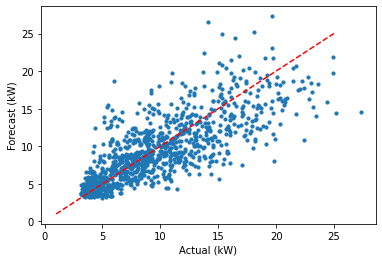

In [99]:
h=1344
plt.scatter(df["crawfordCrescent_F2"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h],s=10)
plt.plot([1,25], [1,25], c="r",ls="--")
plt.xlabel("Actual (kW)")
plt.ylabel("Forecast (kW)")
plt.savefig("linear.jpg", dpi=300)
plt.show()

In [34]:
# Calculate mean absolute error
error = df["crawford_pers_forecast"].iloc[l:h] - df["crawfordCrescent_F2"].iloc[l:h]
MAE = sum(abs(diff)) / (h - l)
# Calculate mean absolute percentage error
MAPE = 100 * sum(abs(diff / df["crawfordCrescent_F2"].iloc[l:h])) / (h - l)

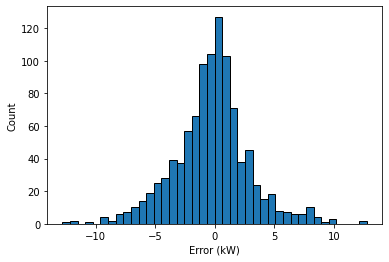

In [100]:
# Histogram of errors
plt.hist(error, bins='auto', edgecolor='black', linewidth=1)
plt.xlabel("Error (kW)")
plt.ylabel("Count")
plt.savefig("hist.jpg", dpi=300)
plt.show()

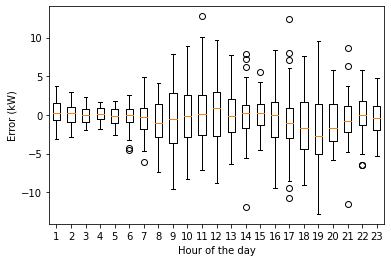

In [101]:
box_data =[]

for i in range(1,24):
    x = error.values[i*2::48]
    y = error.values[i*2-1::48]
    box_data.append(np.concatenate((x,y)))


plt.boxplot(box_data)
plt.xlabel("Hour of the day")
plt.ylabel("Error (kW)")
plt.savefig("boxplot.jpg", dpi=300)
plt.show()
